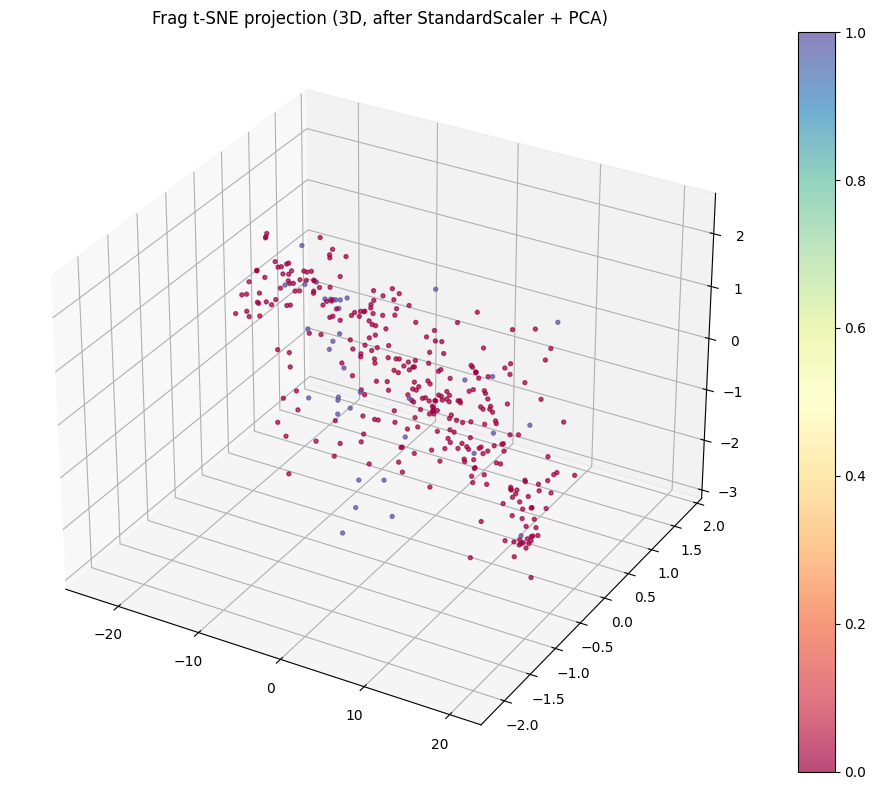

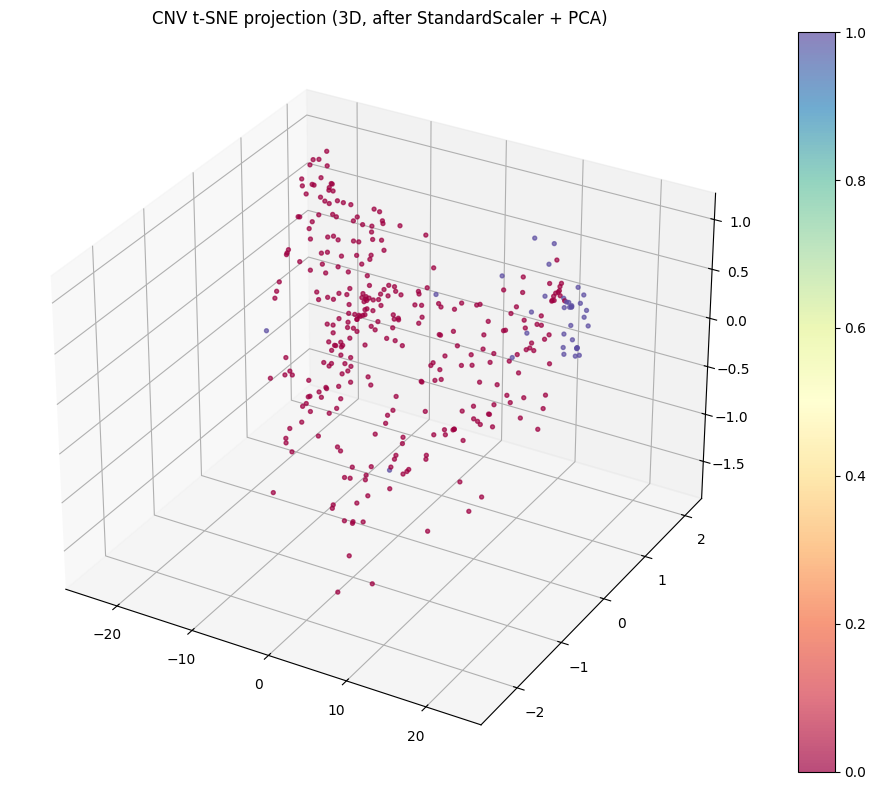

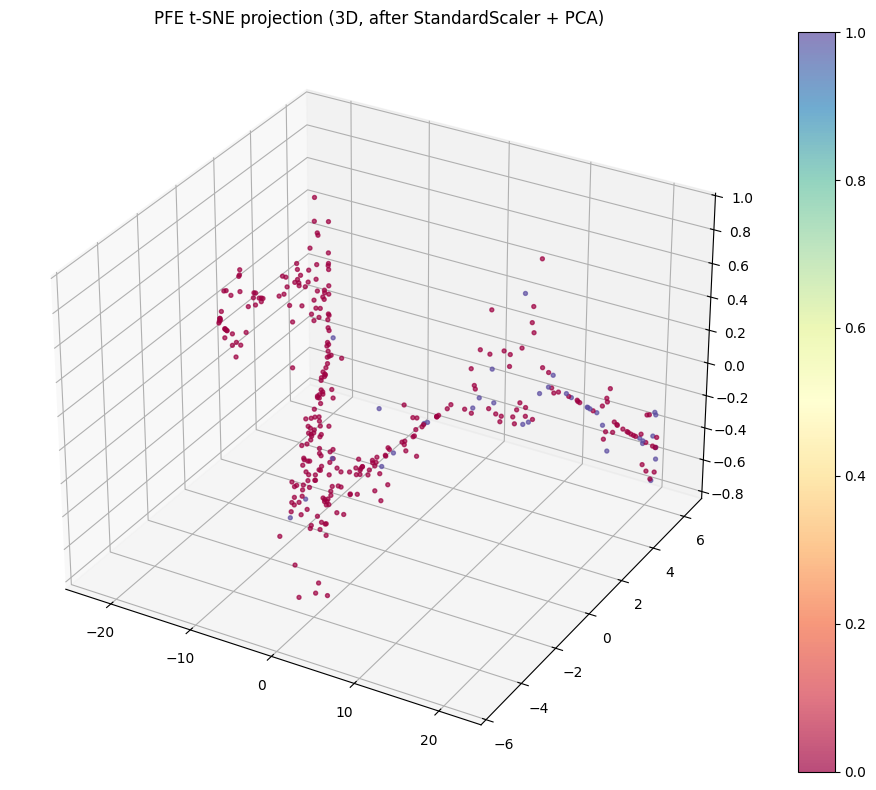

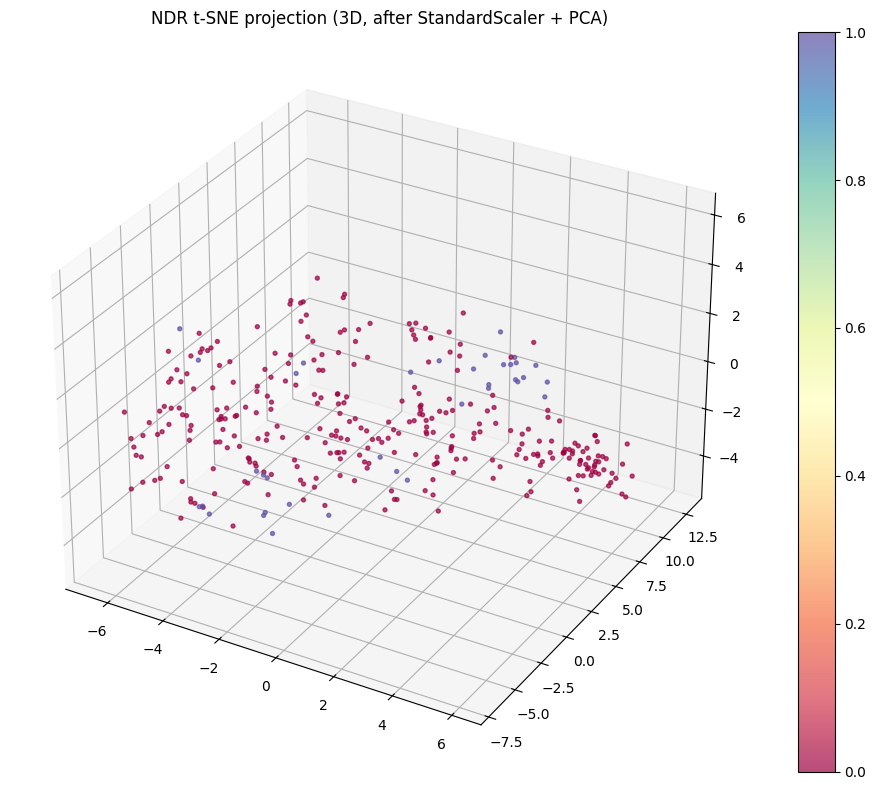

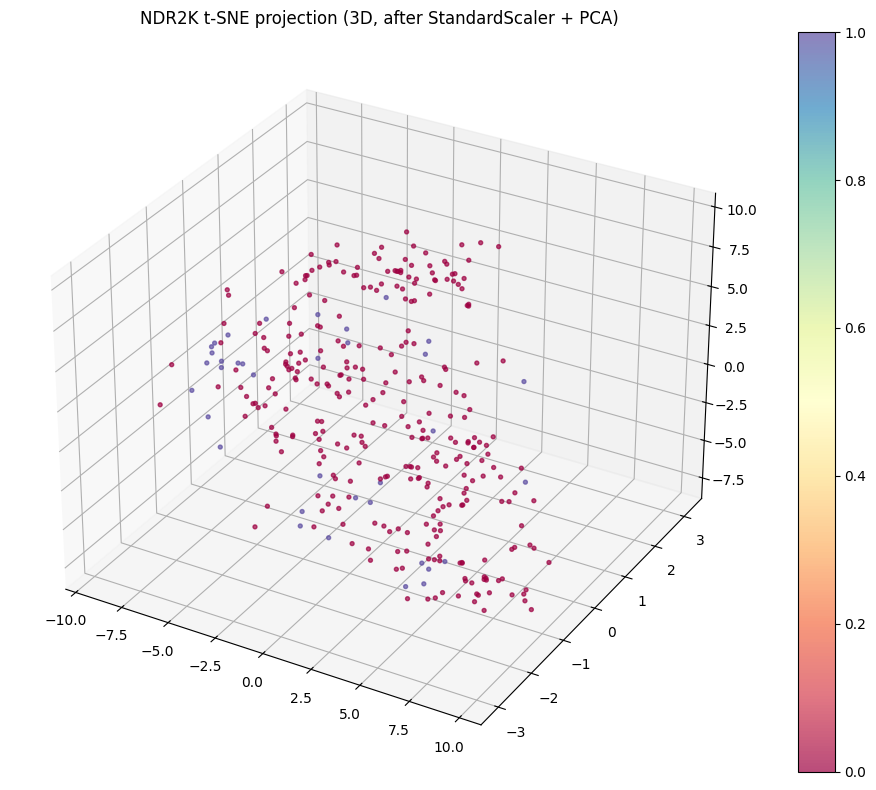

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 用于3D绘图

# 加载数据
data = np.load("/home/maweicheng/database/cfDNA/train.npz")
types = ['Frag', 'CNV', 'PFE', 'NDR', 'NDR2K']

for type in types:
    features = data[type]
    labels = data["y"]

    # 标准化
    scaler = StandardScaler()
    features_std = scaler.fit_transform(features)

    # 可选：PCA降维到50维，加速t-SNE
    pca = PCA(n_components=50)
    features_pca = pca.fit_transform(features_std)

    # t-SNE降维到3D
    tsne = TSNE(n_components=3, random_state=42, init='pca', perplexity=30)
    embedding = tsne.fit_transform(features_pca)

    # 3D 可视化
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
                         c=labels, cmap='Spectral', s=8, alpha=0.7)

    fig.colorbar(scatter, ax=ax)
    ax.set_title(f"{type} t-SNE projection (3D, after StandardScaler + PCA)", fontsize=12)
    plt.tight_layout()
    plt.show()


/softwares/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/softwares/miniconda3/envs/dl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


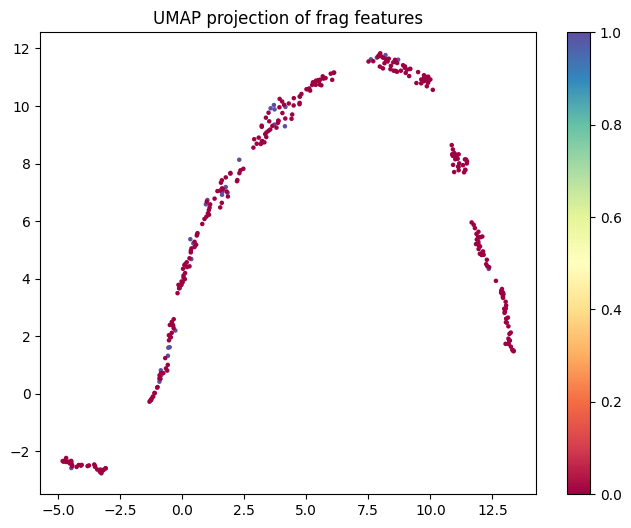

/softwares/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


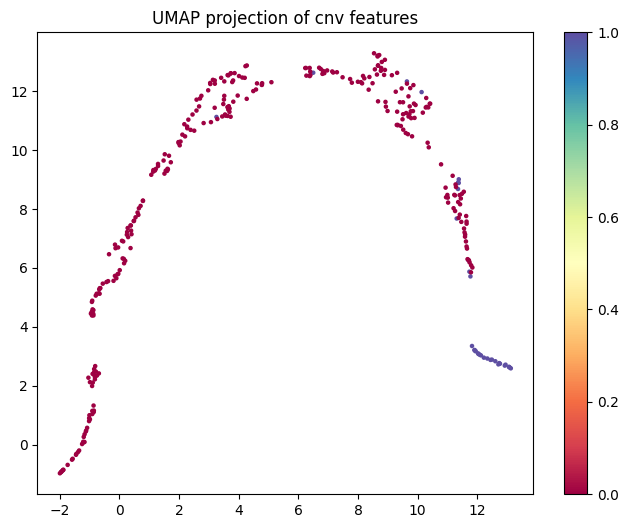

/softwares/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


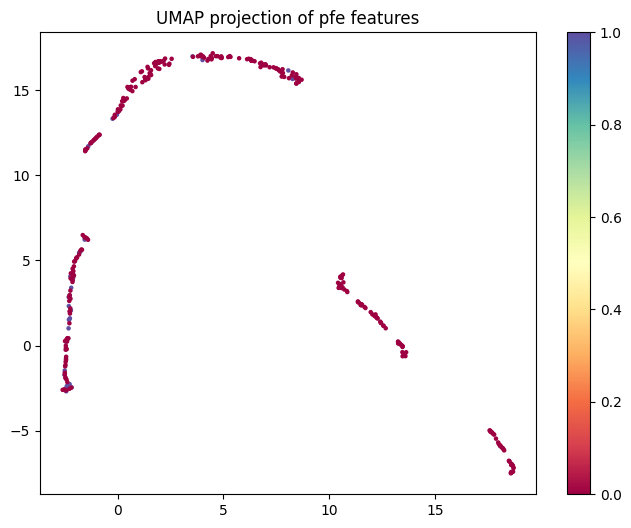

/softwares/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


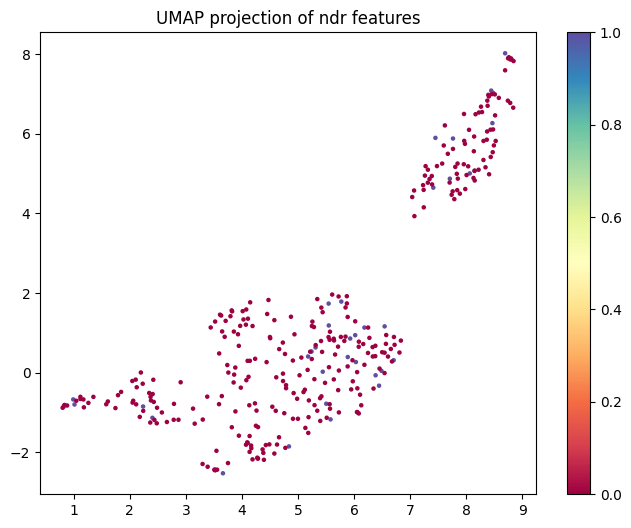

/softwares/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


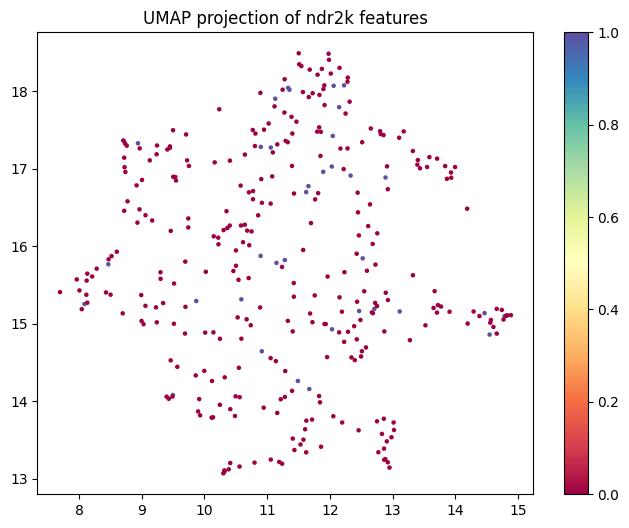

/softwares/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


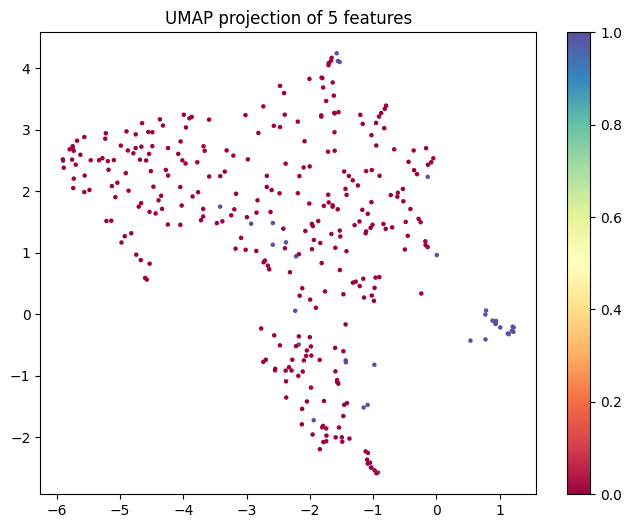

In [8]:
import numpy as np
import umap
import matplotlib.pyplot as plt

# 1. 加载 npz 文件
data = np.load("/home/maweicheng/database/cfDNA/train.npz")

# 2. 选择特征
frag = data["Frag"]         # shape: [N, D1]
cnv  = data["CNV"]          # shape: [N, D2]
pfe  = data["PFE"]          # shape: [N, D3]
ndr  = data["NDR"]          # shape: [N, D3]
ndr2k  = data["NDR2K"]          # shape: [N, D3]
label = data["y"]           # shape: [N]


reducer = umap.UMAP(n_components=2, random_state=42)

frag_embedding = reducer.fit_transform(frag)  # shape: [N, 2]
plt.figure(figsize=(8, 6))
plt.scatter(frag_embedding[:, 0], frag_embedding[:, 1], c=label, cmap='Spectral', s=5)
plt.colorbar()
plt.title("UMAP projection of frag features")
plt.show()

cnv_embedding = reducer.fit_transform(cnv)  # shape: [N, 2]
plt.figure(figsize=(8, 6))
plt.scatter(cnv_embedding[:, 0], cnv_embedding[:, 1], c=label, cmap='Spectral', s=5)
plt.colorbar()
plt.title("UMAP projection of cnv features")
plt.show()

pfe_embedding = reducer.fit_transform(pfe)  # shape: [N, 2]
plt.figure(figsize=(8, 6))
plt.scatter(pfe_embedding[:, 0], pfe_embedding[:, 1], c=label, cmap='Spectral', s=5)
plt.colorbar()
plt.title("UMAP projection of pfe features")
plt.show()

ndr_embedding = reducer.fit_transform(ndr)  # shape: [N, 2]
plt.figure(figsize=(8, 6))
plt.scatter(ndr_embedding[:, 0], ndr_embedding[:, 1], c=label, cmap='Spectral', s=5)
plt.colorbar()
plt.title("UMAP projection of ndr features")
plt.show()

ndr2k_embedding = reducer.fit_transform(ndr2k)  # shape: [N, 2]
plt.figure(figsize=(8, 6))
plt.scatter(ndr2k_embedding[:, 0], ndr2k_embedding[:, 1], c=label, cmap='Spectral', s=5)
plt.colorbar()
plt.title("UMAP projection of ndr2k features")
plt.show()

features = np.concatenate([frag, cnv, pfe, ndr, ndr2k], axis=1)
embedding = reducer.fit_transform(features)  # shape: [N, 2]
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=label, cmap='Spectral', s=5)
plt.colorbar()
plt.title("UMAP projection of 5 features")
plt.show()